In [ ]:
 """# HOMOGENEOUS SPACE-GRID, 1 dim, LEAPHOP
# Mirrored Periodic boundary conditions:
# The actual system is from 2 to Nx-1
# The left neighbor of node 2 is also node 3, etc.

import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0.01
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 50000 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 6
La2 = 3#lambda/2
#lamb = 2 * La2
a = 1
c = 1

# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
u0[0] = u0[2]
u0[Nx - 1] = u0[Nx - 3]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)

# Arrays for calculations
UHeun = np.zeros(Nx)
UTEMP = np.zeros(Nx)
UTEMP2 = np.zeros(Nx)
k = np.zeros(Nx)
Diff = np.zeros(Nx)
ULH = u0.copy()



# Simulation starts
# Big loop for time (Heun)
UHeun = u0.copy()

for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    t = taxis[tind]
    for i in range(Nx):
        k[i] = 0

    for i in range(1, Nx - 1):
        UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h

    UTEMP[0] = UTEMP[2]
    UTEMP[Nx - 1] = UTEMP[Nx - 3]

    for i in range(1, Nx - 1):
        UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h

    UTEMP2[0] = UTEMP2[2]
    UTEMP2[Nx - 1] = UTEMP2[Nx - 2]

    UHeun = UTEMP2

# Leap Hop
ULH = u0.copy()

# Zeroth stage: UPFD, half time step
for i in range(1, Nx - 1, 2):
    k[i] = 0
    mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
    ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

# Big loop for time (Leap Hop)
for tind in range(Nt):  # Adjusted loop to iterate up to Nt

    for i in range(2, Nx - 2, 2):
        k[i] = 0
        mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
        ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

    ULH[0] = ULH[2]
    ULH[Nx - 1] = ULH[Nx - 3]

    for i in range(3, Nx - 1, 2):
        k[i] = 0
        mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

        if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
        else:

            ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                i] * h / 2) / (1 + r / 2)

# LEAP errors
Diff = np.abs(UHeun - ULH)
MaxD[0] = np.max(Diff)
RelDiff = np.abs(2 * (UHeun - ULH) / (UHeun + ULH))
RelMaxD[0] = np.max(RelDiff)
print(MaxD[0])
print(RelMaxD[0])
# Plot
darkblue = [0.1, 0.1, 0.7]
green = [0, 0.9, 0.4]
magenta = [1, 0.2, 1]

plt.plot(xaxis, u0, '-', color=darkblue, linewidth=1.4, markersize=5, label='U0')
plt.plot(xaxis, UHeun, '-d', color=green, linewidth=1, markersize=8, label='Heun')
plt.plot(xaxis, ULH, '-p', color=magenta, linewidth=2, markersize=4, label='LH')


plt.xlabel('x')
plt.ylabel('h')
plt.xlim(0, 32)

#plt.show()
plt.savefig('KPZ_lambda.png')"""

In [ ]:
"""
File with several visualization functions intended to be used
with results from 1D Burgers' equation simulation
"""

############## MODULES IMPORTATION ###############

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os


def plot_spatio_temp_3D(x,t,z):
    """
    Plot a 2 two parameters function z = f(x,t) where x-axis is spatial and y-axis is time.

    (x:np.ndarray (format 1D), y:np.ndarray (format 1D), z:np.ndarray (format 1D)) -> plot
    """
    fig = plt.figure(figsize = (10,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$x \ [\mathrm{m}]$', fontsize = 16)
    ax.set_ylabel('$t \ [\mathrm{s}]$', fontsize = 16)
    ax.set_zlabel('$u \ [\mathrm{m}]$', fontsize = 16)
    ax.view_init(elev = 15, azim = 120)

    SX,ST = np.meshgrid(t,x)
    p = ax.plot_surface(ST,SX,z,cmap = plt.cm.viridis)
    #plt.show()

    # Salvataggio dell'immagine come file PNG
    plt.savefig('KPZ_1_3D.png')



def plot_sequence(x,y):
    fig = plt.figure(figsize = (8,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('$x$ [$\mathrm{m}$]')
    ax.set_ylabel('Time points')
    ax.set_zlabel('$z \ [\mathrm{m}]$')
    ax.view_init(70, -90)
    y_plot = y[0:-1:20,:]
    for j in range(y_plot.shape[0]):
        ys = j*np.ones(y_plot.shape[1])

        ax.plot(x,ys, y_plot[j,:], color = plt.cm.brg(20*j))

    #plt.show()
    plt.savefig('KPZ_1_plot_sequence.png')

def plot_a_frame_1D(x, y, xmin, xmax, ymin, ymax,color, titre = "MON TITRE", type = "-", ion = False):
    """
     Plot a random 1D solution with its plot window.

    (x:np.ndarray (format 1D), y:np.ndarray (format 1D), xmin:float, xmax:float, ymin:float, ymax:float, titre:str, type:str, ion:bool) -> plot
    """
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot(x,y, type , color = color)
    if ion:
        plt.ion()
    plt.title(titre)
    plt.xlabel("$x \ [\mathrm{m}]$.3")
    plt.ylabel("$u \ [\mathrm{m}]$")
    plt.show()

# Nuova sezione
confronto tra modelli

confronto wo noise ma con cond al bordo strane

In [ ]:
# HOMOGENEOUS SPACE-GRID, 1 dim, LEAPHOP
# Mirrored Periodic boundary conditions:
# The actual system is from 2 to Nx-1
# The left neighbor of node 2 is also node 3, etc.

import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 100#00 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D=1
a = 1
c = 1

# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
u0[0] = u0[2]
u0[Nx - 1] = u0[Nx - 3]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)
# Plot
darkblue = [0.1, 0.1, 0.7]
magenta = [1, 0.2, 1]
colors = ['red', 'green', 'blue', 'yellow']

indici_pari = np.arange(0, Nx, 2)
X=xaxis[indici_pari]
indices_lambda = [0.1/2,0.5, 1.5, 3]
#indices_lambda = [3]
D=1
plt.plot(xaxis, u0, '-', color=darkblue, linewidth=1.4, markersize=5, label='U0')
num_plot=0
for La2, color in zip(indices_lambda, colors):
  g=La2*np.sqrt(1/(D**3))
  print('g:',g)
  print(La2)
  num_plot+=1


  # Arrays for calculations
  UHeun = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  k = np.zeros(Nx)
  Diff = np.zeros(Nx)
  ULH = u0.copy()


  """
  # Simulation starts
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
      t = taxis[tind]
      for i in range(Nx):
          k[i] = 0

      for i in range(1, Nx - 1):
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                      UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h

      UTEMP[0] = UTEMP[2]
      UTEMP[Nx - 1] = UTEMP[Nx - 3]

      for i in range(1, Nx - 1):
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
              i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                          i] * h

      UTEMP2[0] = UTEMP2[2]
      UTEMP2[Nx - 1] = UTEMP2[Nx - 2]

      UHeun = UTEMP2
  """
  # Leap Hop
  ULH = u0.copy()

  # Zeroth stage: UPFD, half time step
  for i in range(1, Nx - 1, 2):
      k[i] = 0
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt

      for i in range(2, Nx - 2, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
          ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

      ULH[0] = ULH[2]
      ULH[Nx - 1] = ULH[Nx - 3]

      for i in range(3, Nx - 1, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:

              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)

  """# LEAP errors
  Diff = np.abs(UHeun - ULH)
  MaxD[0] = np.max(Diff)
  RelDiff = np.abs(2 * (UHeun - ULH) / (UHeun + ULH))
  RelMaxD[0] = np.max(RelDiff)
  print(MaxD[0])
  print(RelMaxD[0])
  # Plot
  darkblue = [0.1, 0.1, 0.7]
  green = [0, 0.9, 0.4]
  magenta = [1, 0.2, 1]"""

  #plt.plot(xaxis, UHeun, '-d', color=green, label='Heun_{}'.format(num_plot)')
  plt.plot(xaxis, ULH, '-', color='magenta', label='LH_{}'.format(num_plot))

  plt.xlabel('x')
  plt.ylabel('h')
  plt.xlim(0, 32)
  plt.legend()
  #plt.show()
  plt.savefig('KPZ_D=1_lambda={}.png'.format(i))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 100000 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)




# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
u0[0] = u0[2]
u0[Nx - 1] = u0[Nx - 3]


# Plot
colors = ['red', 'green', 'blue', 'yellow']
colors2=['orange', 'purple', 'cyan', 'magenta']


La2=3

#plt.plot(xaxis, u0, '-', color=darkblue, linewidth=1.4, markersize=5, label='U0')
indices_D = [0.1,1, 3, 6]


for D, color,color2 in zip(indices_D, colors, colors2):
  # Mesh parameters
  r = h * D / Dx ** 2
  r2 = 1 / (Dx * 2)
  g=La2*np.sqrt(1/(D**3))
  print('g:',g)
  print(La2)



  # Arrays for calculations
  UHeun = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  k = np.zeros(Nx)
  Diff = np.zeros(Nx)
  ULH = u0.copy()




  # Simulation starts
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
      t = taxis[tind]
      for i in range(Nx):
          k[i] = 0

      for i in range(1, Nx - 1):
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                      UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h

      UTEMP[0] = UTEMP[2]
      UTEMP[Nx - 1] = UTEMP[Nx - 3]

      for i in range(1, Nx - 1):
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
              i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                          i] * h

      UTEMP2[0] = UTEMP2[2]
      UTEMP2[Nx - 1] = UTEMP2[Nx - 2]

      UHeun = UTEMP2

  # Leap Hop
  ULH = u0.copy()

  # Zeroth stage: UPFD, half time step
  for i in range(1, Nx - 1, 2):
      k[i] = 0
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt

      for i in range(2, Nx - 2, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
          ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

      ULH[0] = ULH[2]
      ULH[Nx - 1] = ULH[Nx - 3]

      for i in range(3, Nx - 1, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:

              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)

  # LEAP errors
  Diff = np.abs(UHeun - ULH)
  MaxD[0] = np.max(Diff)
  RelDiff = np.abs(2 * (UHeun - ULH) / (UHeun + ULH))
  RelMaxD[0] = np.max(RelDiff)
  print(MaxD[0])
  print(RelMaxD[0])


  plt.plot(xaxis[:-1], UHeun[:-1], '-', color=color, label='Heun_lam={}'.format(D))
  plt.plot(xaxis[:-1], ULH[:-1], '--', color=color2, label='LH_lam={}'.format(D))
  #print(xaxis[:-1].shape)
  plt.xlabel('x')
  plt.ylabel('h(x,t)')
  plt.xlim(0, 32)
  plt.legend()
  #plt.show()
  plt.savefig('KPZ_Ds_lambda=6_bond.png')

confronto wo noise ma con cond al bordo classiche

In [ ]:
# HOMOGENEOUS SPACE-GRID, 1 dim, LEAPHOP
# Mirrored Periodic boundary conditions:
# The actual system is from 2 to Nx-1
# The left neighbor of node 2 is also node 3, etc.

import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 100000 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / Nx
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 3
La2 = 3#lambda/2


# Fill initial function
for i in range(0, Nx-1):
    xaxis[i] = xi + i * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
u0[Nx-1]=u0[0]
xaxis[Nx-1] = xaxis[0]
# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)

# Arrays for calculations
UHeun = np.zeros(Nx)
UTEMP = np.zeros(Nx)
UTEMP2 = np.zeros(Nx)
k = np.zeros(Nx)
Diff = np.zeros(Nx)
ULH = u0.copy()

# Simulation starts
# Big loop for time (Heun)
UHeun = u0.copy()

for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    t = taxis[tind]
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i==0:
          UTEMP[i] = UHeun[i] + r * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[Nx-1]) ** 2 * h + k[i] * h
        elif i == Nx-1:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[0] - UHeun[i - 1]) ** 2 * h + k[i] * h
        else:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h


    for i in range(0, Nx):
        if i==0:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[Nx-1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[Nx-1]) ** 2 + (UTEMP[i + 1] - UTEMP[Nx-1]) ** 2) + k[
                         i] * h
        elif i == Nx-1:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[0] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[0] - UHeun[i - 1]) ** 2 + (UTEMP[0] - UTEMP[i - 1]) ** 2) + k[
                         i] * h
        else:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h


    UHeun = UTEMP2

def Heun(r,r2,u0,xaxis,c,D,La2,a,taxis,Nx,Nt,h,tf):
  UHeun = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  k = np.zeros(Nx)
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    t = taxis[tind]
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i==0:
          UTEMP[i] = UHeun[i] + r * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[Nx-1]) ** 2 * h + k[i] * h
        elif i == Nx-1:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[0] - UHeun[i - 1]) ** 2 * h + k[i] * h
        else:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h


    for i in range(0, Nx):
        if i==0:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[Nx-1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[Nx-1]) ** 2 + (UTEMP[i + 1] - UTEMP[Nx-1]) ** 2) + k[
                         i] * h
        elif i == Nx-1:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[0] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[0] - UHeun[i - 1]) ** 2 + (UTEMP[0] - UTEMP[i - 1]) ** 2) + k[
                         i] * h
        else:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h


    UHeun = UTEMP2

  return UHeun

 # Plot
darkblue = [0.1, 0.1, 0.7]
green = [0, 0.9, 0.4]
magenta = [1, 0.2, 1]

plt.plot(xaxis, u0, '-', color=darkblue, label='U0')
plt.plot(xaxis, UHeun, '-', color=green, label='Heun')
plt.plot(xaxis, Heun(r,r2,u0,xaxis,c,D,La2,a,taxis,Nx,Nt,h,tf), '-', color=magenta, label='Heun2')


plt.xlabel('x')
plt.ylabel('h')
plt.xlim(0, 32)
plt.show()

In [ ]:
  # Simulation starts
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt

    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i==0:
          UTEMP[i] = UHeun[i] + r * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i]) + La2* h * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[Nx-1]) ** 2  + k[i] * h
        elif i == Nx-1:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i]) + La2* h * r2 ** 2 * (
                    UHeun[0] - UHeun[i - 1]) ** 2  + k[i] * h
        else:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2* h * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2  + k[i] * h


    for i in range(0, Nx):
        if i==0:
          UTEMP2[i] = UHeun[i] + (r / 2) * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[Nx-1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h  * ((UHeun[i + 1] - UHeun[Nx-1]) ** 2 + (UTEMP[i + 1] - UTEMP[Nx-1]) ** 2) + k[
                         i] * h
        elif i == Nx-1:
          UTEMP2[i] = UHeun[i] + (r / 2) * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[0] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h  * ((UHeun[0] - UHeun[i - 1]) ** 2 + (UTEMP[0] - UTEMP[i - 1]) ** 2) + k[
                         i] * h
        else:
          UTEMP2[i] = UHeun[i] + (r / 2) * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h  * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h


    UHeun = UTEMP2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 100000 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / Nx
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D=1

# Fill initial function
for i in range(0, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
u0[Nx-1]=u0[0]
xaxis[Nx-1] = xaxis[0]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)
# Plot
colors = ['red', 'green', 'blue', 'yellow']
colors2=['orange', 'purple', 'cyan', 'magenta']
indici_pari = np.arange(0, Nx, 2)
X=xaxis[indici_pari]
indices_lambda = [0.1/2,0.5, 1.5, 3]


#plt.plot(xaxis, u0, '-', color=darkblue, linewidth=1.4, markersize=5, label='U0')

for La2, color,color2 in zip(indices_lambda, colors, colors2):
  g=La2*np.sqrt(1/(D**3))
  print('g:',g)
  print(La2)



  # Arrays for calculations
  UHeun = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP0 = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  k = np.zeros(Nx)
  Diff = np.zeros(Nx)
  ULH = u0.copy()
  Hsimple=np.zeros(Nx)


  Hsimple = u0.copy()

  for tind in range(Nt):
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i == 0:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[Nx - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[i + 1] - Hsimple[Nx - 1]) ** 2  + k[i] * h
        elif i == Nx - 1:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[0] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[0] - Hsimple[i - 1]) ** 2  + k[i] * h
        else:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h* (
                Hsimple[i + 1] - Hsimple[i - 1]) ** 2  + k[i] * h

    Hsimple = UTEMP0


  # Simulation starts
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    t = taxis[tind]
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i==0:
          UTEMP[i] = UHeun[i] + r * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[Nx-1]) ** 2 * h + k[i] * h
        elif i == Nx-1:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[0] - UHeun[i - 1]) ** 2 * h + k[i] * h
        else:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h


    for i in range(0, Nx):
        if i==0:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[Nx-1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[Nx-1]) ** 2 + (UTEMP[i + 1] - UTEMP[Nx-1]) ** 2) + k[
                         i] * h
        elif i == Nx-1:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[0] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[0] - UHeun[i - 1]) ** 2 + (UTEMP[0] - UTEMP[i - 1]) ** 2) + k[
                         i] * h
        else:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h


    UHeun = UTEMP2
  """

  # Leap Hop
  ULH = u0.copy()

  # Zeroth stage: UPFD, half time step

  for i in range(1, Nx - 1, 2):
      k[i] = 0
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt


      for i in range(0, Nx, 2):
          k[i] = 0
          if i == 0:
            mm = 0.25 * (ULH[Nx-1] - ULH[i + 1]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[Nx-1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          if i == Nx-1:
            mm = 0.25 * (ULH[i - 1] - ULH[0]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[0]) + r * La2 / D * mm + k[i] * h) / (1 + r)

          else:

            mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)



      for i in range(1, Nx - 1, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:

              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)

  # LEAP errors
  Diff = np.abs(UHeun - ULH)
  MaxD[0] = np.max(Diff)
  RelDiff = np.abs(2 * (UHeun - ULH) / (UHeun + ULH))
  RelMaxD[0] = np.max(RelDiff)
  print(MaxD[0])
  print(RelMaxD[0])"""

  plt.plot(xaxis[:-1], Hsimple[:-1], '--', color=color, label='FTCS_lam={}'.format(2*La2))
  plt.plot(xaxis[:-1], UHeun[:-1], '--', color=color2, label='Heun_lam={}'.format(2*La2))
  #plt.plot(xaxis[:-1], ULH[:-1], '--', color=color2, label='LH_lam={}'.format(2*La2))
  #print(xaxis[:-1].shape)
  plt.xlabel('x')
  plt.ylabel('h(x,t)')
  plt.xlim(0, 32)
  plt.legend()
  #plt.show()
  plt.savefig('KPZ_D=1_lambdas_vs.png')

1e-05
0.00999687597625742
[0.0000e+00 1.0000e-05 2.0000e-05 ... 9.9998e-01 9.9999e-01 1.0000e+00]
g: 0.05
0.05


KeyboardInterrupt: ignored

In [ ]:
Hsimple = u0.copy()

for tind in range(Nt):
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i == 0:
            UTEMP[i] = Hsimple[i] + r * (Hsimple[Nx - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[i + 1] - Hsimple[Nx - 1]) ** 2  + k[i] * h
        elif i == Nx - 1:
            UTEMP[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[0] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[0] - Hsimple[i - 1]) ** 2  + k[i] * h
        else:
            UTEMP[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h* (
                Hsimple[i + 1] - Hsimple[i - 1]) ** 2  + k[i] * h

    Hsimple = UTEMP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 100000 * TIME
h = TIME / Nt
print(h)
#Space discretization
Nx = 3201
xi = 0
L = 32
xf = xi + L
Dx = L / Nx
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print(taxis)

# Initial function
u0 = np.zeros(Nx)

#Errors: Max, Average and Relative

# Initialize MaxD as an array
MaxD = np.zeros(3)
# Initialize RelMaxD as an array
RelMaxD = np.zeros(3)




# Fill initial function
for i in range(0, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
u0[Nx-1]=u0[0]
xaxis[Nx-1] = xaxis[0]


# Plot
colors = ['red', 'green', 'blue', 'yellow']
colors2=['orange', 'purple', 'cyan', 'magenta']
indici_pari = np.arange(0, Nx, 2)
X=xaxis[indici_pari]
indices_lambda = [0.1/2,0.5, 1.5, 3]
La2=3

#plt.plot(xaxis, u0, '-', color=darkblue, linewidth=1.4, markersize=5, label='U0')
indices_D = [0.1,1, 3, 6]


for D, color,color2 in zip(indices_D, colors, colors2):
  # Mesh parameters
  r = h * D / Dx ** 2
  r2 = 1 / (Dx * 2)
  g=La2*np.sqrt(1/(D**3))
  print('g:',g)
  print(La2)



  # Arrays for calculations
  #UHeun = np.zeros(Nx)
  UTEMP0 = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  k = np.zeros(Nx)
  Diff = np.zeros(Nx)
  Hsimple=np.zeros(Nx)


  Hsimple = u0.copy()

  for tind in range(Nt):
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i == 0:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[Nx - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[i + 1] - Hsimple[Nx - 1]) ** 2  + k[i] * h
        elif i == Nx - 1:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[0] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h * (
                Hsimple[0] - Hsimple[i - 1]) ** 2  + k[i] * h
        else:
            UTEMP0[i] = Hsimple[i] + r * (Hsimple[i - 1] + Hsimple[i + 1] - 2 * Hsimple[i]) + La2 * (r2 ** 2) * h* (
                Hsimple[i + 1] - Hsimple[i - 1]) ** 2  + k[i] * h

    Hsimple = UTEMP0


  # Simulation starts
  # Big loop for time (Heun)
  UHeun = u0.copy()

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    t = taxis[tind]
    for i in range(Nx):
        k[i] = 0

    for i in range(0, Nx):
        if i==0:
          UTEMP[i] = UHeun[i] + r * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[Nx-1]) ** 2 * h + k[i] * h
        elif i == Nx-1:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[0] - UHeun[i - 1]) ** 2 * h + k[i] * h
        else:
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                    UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h


    for i in range(0, Nx):
        if i==0:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[Nx-1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[Nx-1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[Nx-1]) ** 2 + (UTEMP[i + 1] - UTEMP[Nx-1]) ** 2) + k[
                         i] * h
        elif i == Nx-1:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[0] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[0] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[0] - UHeun[i - 1]) ** 2 + (UTEMP[0] - UTEMP[i - 1]) ** 2) + k[
                         i] * h
        else:
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
            i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                         i] * h


    UHeun = UTEMP2
  """

  # Leap Hop
  ULH = u0.copy()

  # Zeroth stage: UPFD, half time step

  for i in range(1, Nx - 1, 2):
      k[i] = 0
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt


      for i in range(0, Nx, 2):
          k[i] = 0
          if i == 0:
            mm = 0.25 * (ULH[Nx-1] - ULH[i + 1]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[Nx-1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          if i == Nx-1:
            mm = 0.25 * (ULH[i - 1] - ULH[0]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[0]) + r * La2 / D * mm + k[i] * h) / (1 + r)

          else:

            mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)



      for i in range(1, Nx - 1, 2):
          k[i] = 0
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:

              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)

  # LEAP errors
  Diff = np.abs(UHeun - ULH)
  MaxD[0] = np.max(Diff)
  RelDiff = np.abs(2 * (UHeun - ULH) / (UHeun + ULH))
  RelMaxD[0] = np.max(RelDiff)
  print(MaxD[0])
  print(RelMaxD[0])"""


  plt.plot(xaxis[:-1], Hsimple[:-1], '-', color=color, label='FTCS_diff={}'.format(D))
  plt.plot(xaxis[:-1], UHeun[:-1], '--', color=color2, label='Heun_diff={}'.format(D))
  #plt.plot(xaxis[:-1], ULH[:-1], '--', color=color2, label='LH_diff={}'.format(D))
  #print(xaxis[:-1].shape)
  plt.xlabel('x')
  plt.ylabel('h(x,t)')
  plt.xlim(0, 32)
  plt.legend()
  #plt.show()
  plt.savefig('KPZ_Ds_lambda=6_vs.png')

1e-05
0.00999687597625742
[0.0000e+00 1.0000e-05 2.0000e-05 ... 9.9998e-01 9.9999e-01 1.0000e+00]
g: 94.86832980505136
3


KeyboardInterrupt: ignored

# Nuova sezione
calcolo esponente di crescita

0.0002
0.010006253908692933


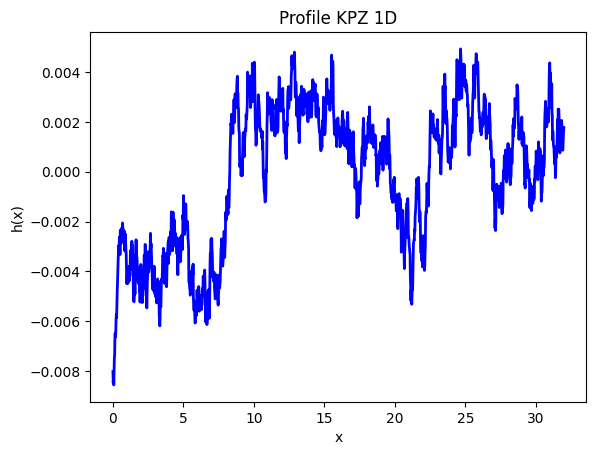

In [ ]:
# HOMOGENEOUS SPACE-GRID, 1 dim, LEAPHOP
# Mirrored Periodic boundary conditions:
# The actual system is from 2 to Nx-1
# The left neighbor of node 2 is also node 3, etc.

import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 0.1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 500
#Nt = 5000 * TIME
h = TIME / Nt
print(h)

#Space discretization
Nx = 3201#257
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
#print(taxis)

# Initial function
u0 = np.zeros(Nx)

# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 10
La2 = 3 #lambda/2

a = 1
c = 1

# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    #u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
#u0[0] = u0[2]
#u0[Nx - 1] = u0[Nx - 3]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)

k_values = []
ULH_values = []
# Arrays for calculations
k = np.zeros(Nx)

# Leap Hop
ULH = u0.copy()

#I want to save the spatial points for each time because I want to use the to study the growth exponent
k_values.append(k.copy())
ULH_values.append(ULH.copy())


# Zeroth stage: UPFD, half time step
for i in range(1, Nx - 1, 2):
    k[i] = 1 * np.random.normal(0, 10)
    mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
    ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

# Big loop for time (Leap Hop)
for tind in range(Nt):  # Adjusted loop to iterate up to Nt
    #t = taxis[tind]
    for i in range(2, Nx - 2, 2):
        k[i] = 1* np.random.normal(0, 10)
        mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
        ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

    ULH[0] = ULH[2]
    ULH[Nx - 1] = ULH[Nx - 3]
    k_values.append(k.copy())
    ULH_values.append(ULH.copy())
    for i in range(1, Nx - 1, 2):
        k[i] = 1 * np.random.normal(0, 10)
        mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

        if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

            ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
        else:
            #print('hello')
            ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                i] * h / 2) / (1 + r / 2)


H=np.array(ULH_values)
#print(H.shape)

even_indices = np.arange(0, Nx, 2)
X=xaxis[even_indices]

l=H[:,even_indices]
#plot_spatio_temp_3D(X,taxis,l.T)

#plot_sequence(X,l)



#average mean
mean_h=np.zeros((Nt+1))
mean_h = np.mean(l, axis=1)
# Interface width
W=np.zeros((Nt+1))

for i in range(Nt+1):
  W[i]= np.sqrt(np.mean((l[i,:] - mean_h[i])*(l[i,:] - mean_h[i]) ))#*(l[-1,:].shape)/L)
#print(W)


plt.figure()
plt.plot(X,l[-1,:], 'b', linewidth=2)
plt.title('Profile KPZ 1D')
plt.xlabel('x')
plt.ylabel('h(x)')


"""
plt.figure()
plt.loglog(taxis, W, 'b*', linewidth=2)
plt.title('Interface Width')
plt.xlabel('t')
plt.ylabel('W(t)')
"""

nff = len(taxis)
hm = np.mean(W[:nff])

nf = np.argmax(W >= (hm - 0.01))-1


sum -6.550315845288424e-13
MSE: 0.002001097378152626
RMSE: 0.04473362692821392
RMSE Relative: -0.01698834815723098
SE della pendenza: 0.004739115187118192


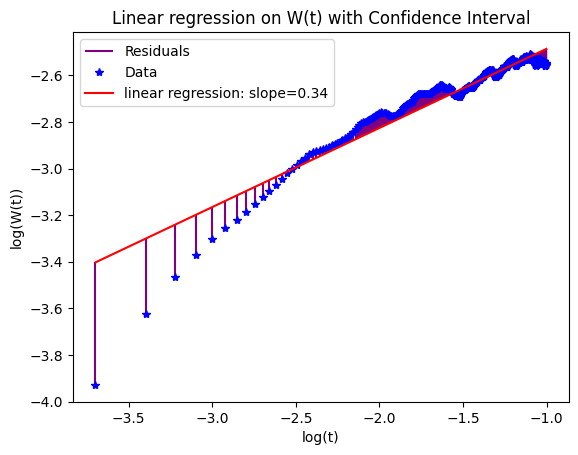

In [ ]:
# linear regression
coefficients = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1)
slope, intercept = coefficients


print(f"Pendenza: {slope}")
print(f"Errore sulla pendenza: {std_err}")
y_fit = 10 ** (slope * np.log10(taxis[1:nf]) + intercept)

residuals = np.log10(W[1:nf]) - np.log10(y_fit)
#print(residuals)
print('sum',np.sum(residuals))
# Calcola l'MSE
mse = np.mean((residuals)**2)

# Calcola la deviazione standard degli errori quadratici (RMSE)
rmse = np.sqrt(mse)

# Calcola l'errore quadratico medio relativo (RMSE relativo)
rmse_relative = rmse / np.mean(np.log10(W[1:nf]))

print("MSE:", mse)
print("RMSE:", rmse)
print("RMSE Relative:", rmse_relative)


# Calcola la deviazione standard della pendenza
x_mean = np.mean(np.log10(taxis[1:nf]))
se_slope = np.sqrt((np.sum(residuals**2) / (len(np.log10(taxis[1:nf])) - 2)) / np.sum((np.log10(taxis[1:nf]) - x_mean)**2))

# La se_slope è l'errore standard della pendenza
print("SE della pendenza:", se_slope)

#plt.plot(np.log10(taxis[1:]), y_hat, "s", color="red")
plt.vlines(np.log10(taxis[1:nf]), np.log10(W[1:nf]), np.log10(W[1:nf])-residuals, colors='purple', label='Residuals')


plt.plot(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 'b*', label='Data')
plt.plot(np.log10(taxis[1:nf]), np.log10(y_fit), '-r', label=f'linear regression: slope={slope:.2f}')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('log(t)')
plt.ylabel('log(W(t))')
plt.title('Linear regression on W(t) with Confidence Interval')
plt.legend()

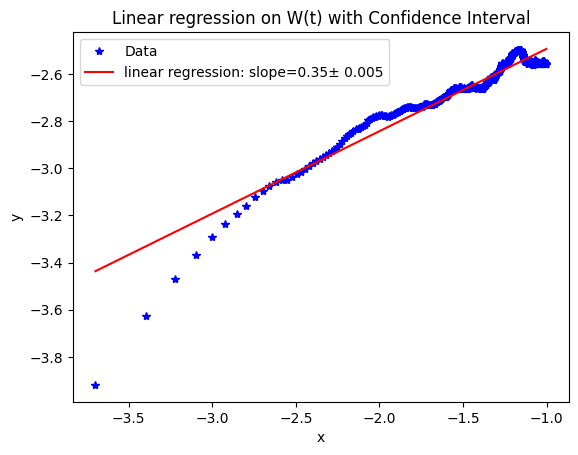

Errore standard della pendenza: 0.004634746060965309


In [ ]:

# Calcola la regressione lineare
coefficients, cov_matrix = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1, cov=True)
slope, intercept = coefficients

y_fit = 10 ** (slope * np.log10(taxis[1:nf]) + intercept)

# Estrai la varianza dalla matrice di covarianza
var_slope = cov_matrix[0, 0]

# Calcola l'errore standard della pendenza
se_slope = np.sqrt(var_slope)


plt.loglog(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 'b*', label='Data')
plt.loglog(np.log10(taxis[1:nf]), np.log10(y_fit), '-r', label=f'linear regression: slope={slope:.2f}± {se_slope:.3f}')
plt.xlabel('log(t)')
plt.ylabel('log(W(t))')
plt.title('Linear regression on W(t) with Confidence Interval')
plt.legend()

print("Errore standard della pendenza:", se_slope)


faccio la media su varie traiettorie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Initial time and length of the time interval
ti = 0
TIME = 0.1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 500#0000
#Nt = 5000 * TIME
h = TIME / Nt
print(h)

#Space discretization
Nx = 3201#257
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
#print(taxis)

# Initial function
u0 = np.zeros(Nx)

# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 10
La2 = 3 #lambda/2


# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    #u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
#u0[0] = u0[2]
#u0[Nx - 1] = u0[Nx - 3]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)
num_sample=50
w=np.zeros((num_sample,Nt+1))
W=np.zeros((Nt+1))
for s in range(num_sample):


        k_values = []
        ULH_values = []
        # Arrays for calculations
        k = np.zeros(Nx)

        # Leap Hop
        ULH = u0.copy()

        #I want to save the spatial points for each time because I want to use the to study the growth exponent
        k_values.append(k.copy())
        ULH_values.append(ULH.copy())


        # Zeroth stage: UPFD, half time step
        for i in range(1, Nx - 1, 2):
            k[i] = 1 * np.random.normal(0, 10)
            mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
            ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

        # Big loop for time (Leap Hop)
        for tind in range(Nt):  # Adjusted loop to iterate up to Nt
            #t = taxis[tind]
            for i in range(2, Nx - 2, 2):
                k[i] = 1* np.random.normal(0, 10)
                mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
                ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

            ULH[0] = ULH[2]
            ULH[Nx - 1] = ULH[Nx - 3]
            k_values.append(k.copy())
            ULH_values.append(ULH.copy())
            for i in range(1, Nx - 1, 2):
                k[i] = 1 * np.random.normal(0, 10)
                mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

                if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

                    ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
                else:
                    #print('nene')
                    ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                        i] * h / 2) / (1 + r / 2)


        H=np.array(ULH_values)
        #print(H.shape)

        even_indices = np.arange(0, Nx, 2)
        X=xaxis[even_indices]

        l=H[:,even_indices]

        #average mean
        mean_h = np.zeros((Nt+1))
        mean_h = np.mean(l, axis=1)
        # Interface width


        for i in range(Nt+1):
          w[s,i]= np.sqrt(np.mean((l[i,:] - mean_h[i])*(l[i,:] - mean_h[i]) ))#*(l[-1,:].shape)/L)

        """slope, intercept = np.polyfit(np.log10(taxis[1:]), np.log10(w[s,1:]), 1)
        y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)

        # Plot of data and regression
        plt.loglog(taxis[1:], w[s,1:], 'b*', label='Dati')
        plt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')
        plt.legend()
        plt.show()"""



0.0002
0.010006253908692933


-1
Pendenza: 0.2976796633562871
Errore sulla pendenza: 0.0032443015570767573


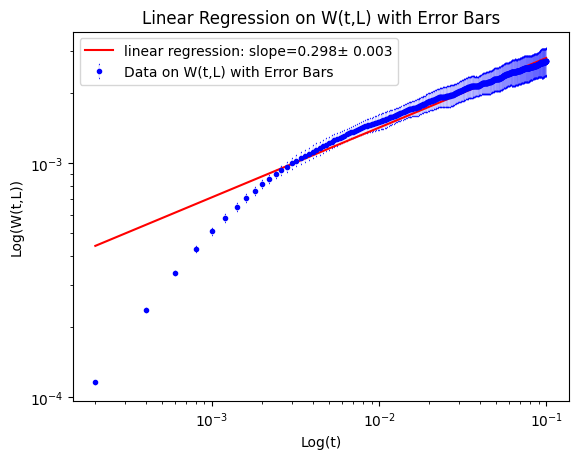

In [ ]:
W=np.mean(w,axis=0)

dev_stand= np.zeros((Nt+1))
for i in range(Nt+1):
 dev_stand[i]= np.std(w[:, i])
#print(dev_stand)

nff = len(taxis)
hm = np.mean(W[:nff])

nf = np.argmax(W >= (hm - 0.01))-1
#nf = len(taxis)
# linear regression
print(nf)
#coefficients, cov_matrix = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1, cov=True)
#slope, intercept = coefficients
# Calcolo del fit lineare con pesi sugli errori di y
from scipy.optimize import curve_fit

# Funzione di fit (equazione di una retta)
def linear_fit(x, slope, intercept):
    return slope * x + intercept



# Inizializzazione dei parametri del fit
initial_guess = [0.33, -2.14]  # Pendenza e intercetta iniziali

# Eseguire il fit con curve_fit
parameters, covariance = curve_fit(linear_fit, np.log10(taxis[1:nf]), np.log10(W[1:nf]), p0=initial_guess, sigma=np.log10(dev_stand[1:nf]))

# Estrai i parametri del fit
slope, intercept = parameters

# Estrai l'errore sulla pendenza dalla matrice di covarianza
#slope_error = np.sqrt(covariance[0, 0])
slopei = np.sqrt(np.diag(covariance))
slope_error = slopei[0]
print(f"Pendenza: {slope}")
print(f"Errore sulla pendenza: {slope_error}")


y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)
# Plot of data and regression
plt.errorbar(taxis[1:], W[1:], yerr=dev_stand[1:], fmt='.', color='blue', elinewidth=0.1, capsize=0.3, label='Data on W(t,L) with Error Bars')

plt.plot(taxis[1:], y_fit, '-r', label=f'linear regression: slope={slope:.3f}± {slope_error:.3f}')

plt.xscale('log')  # Imposta l'asse x in scala logaritmica
plt.yscale('log')  # Imposta l'asse y in scala logaritmica
plt.xlabel('Log(t)')
plt.ylabel('Log(W(t,L))')
plt.title('Linear Regression on W(t,L) with Error Bars')
plt.legend()
plt.savefig('fit_MEAN_LH_with_errorbars.png')
plt.show()

In [ ]:
"""# HOMOGENEOUS SPACE-GRID, 1 dim, LEAPHOP
# Mirrored Periodic boundary conditions:
# The actual system is from 2 to Nx-1
# The left neighbor of node 2 is also node 3, etc.

import numpy as np
import matplotlib.pyplot as plt

# Parameters

#Initial time and length of the time interval
ti = 0
TIME = 0.1
tf = ti + TIME
#Number of time steps and lenght of the time step
Nt = 500
#Nt = 5000 * TIME
h = TIME / Nt
print(h)

#Space discretization
Nx = 256#257
xi = 0
L = 32
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
#print(taxis)

# Initial function
u0 = np.zeros(Nx)

# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 10
La2 = 3 #lambda/2
#lamb = 2 * La2
a = 1
c = 1

# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx
    u0[i] = np.sin(np.pi * (xaxis[i] / 4)) + np.cos(np.pi * (xaxis[i] / 4))

#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
u0[0] = u0[2]
u0[Nx - 1] = u0[Nx - 3]

# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)
def kpz(r,r2,xaxis,c,D,La2,a,taxis,Nx,Nt,h,tf,u0):
  k_values = []
  ULH_values = []
  # Arrays for calculations
  k = np.zeros(Nx)

  # Leap Hop
  ULH = u0.copy()

  #I want to save the spatial points for each time because I want to use the to study the growth exponent
  k_values.append(k.copy())
  ULH_values.append(ULH.copy())


  # Zeroth stage: UPFD, half time step
  for i in range(1, Nx - 1, 2):
      k[i] = 1 * np.random.normal(0, 10)
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
      #t = taxis[tind]
      for i in range(2, Nx - 2, 2):
          k[i] = 1* np.random.normal(0, 10)
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
          ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

      ULH[0] = ULH[2]
      ULH[Nx - 1] = ULH[Nx - 3]
      k_values.append(k.copy())
      ULH_values.append(ULH.copy())

      for i in range(1, Nx - 1, 2):
          k[i] = 1 * np.random.normal(0, 10)
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:
              #print('nene')
              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)
              #ULH[tind+2,i] con i pari deve essere 0
  even_indices = np.arange(0, Nx, 2)
  H=np.array(ULH_values)[:,even_indices]
  return H #np.array(ULH_values)#,np.array(k_values)


l=kpz(r,r2,xaxis,c,D,La2,a,taxis,Nx,Nt,h,tf,u0)
even_indices = np.arange(0, Nx, 2)
X=xaxis[even_indices]


plot_spatio_temp_3D(X,taxis,l.T)

plot_sequence(X,l)


#average mean
mean_h=np.zeros((Nt+1))
mean_h = np.mean(l, axis=1)
# Interface width
W=np.zeros((Nt+1))

for i in range(Nt+1):
  W[i]= np.sqrt(np.mean((l[i,:] - mean_h[i])*(l[i,:] - mean_h[i]) ))#*(l[-1,:].shape)/L)
#print(W)


plt.figure()
plt.plot(X,l[-1,:], 'b', linewidth=2)
plt.title('Profile KPZ 1D')
plt.xlabel('x')
plt.ylabel('h(x)')



plt.figure()
plt.loglog(taxis, W, 'b*', linewidth=2)
plt.title('Interface Width')
plt.xlabel('t')
plt.ylabel('W(t)')


nff = len(taxis)
hm = np.mean(W[:nff])

nf = np.argmax(W >= (hm - 0.01))-1

# linear regression
print(nf)
slope, intercept = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1)
y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)

# Plot of data and regression
plt.loglog(taxis[1:], W[1:], 'b*', label='Dati')
plt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')


plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('linear regression on W(t)')
plt.legend()

# Mostra il plot
plt.show()

# Nuova sezione

esponente di crescita per traiettorie di input

In [ ]:
pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=e5312db4d293015260b2a00731ff74df66586432043db83a5b9d79d7e9f1964b
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


0.12648221343873517
taxis.shape (50,)
xaxis.shape (256,)


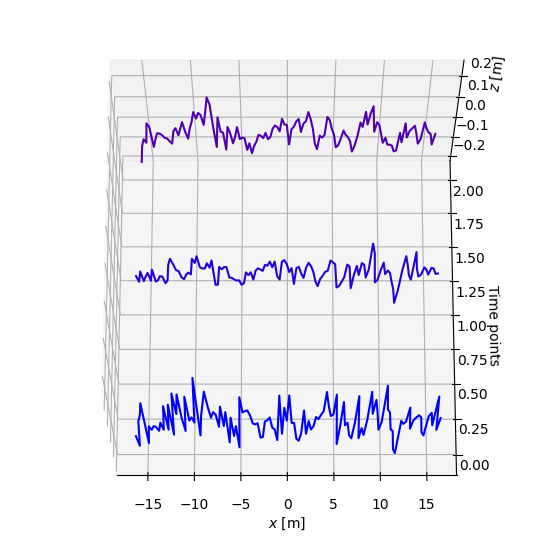

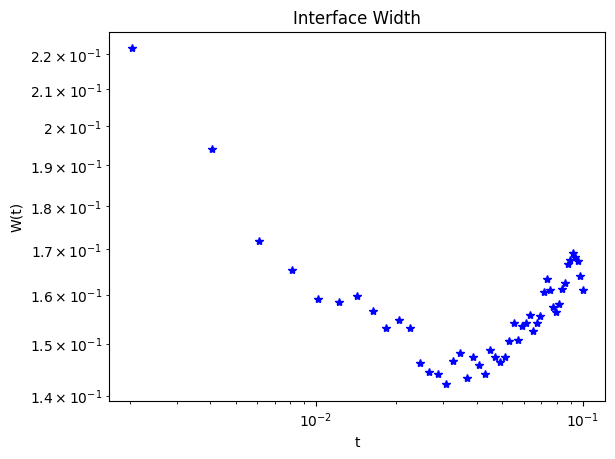

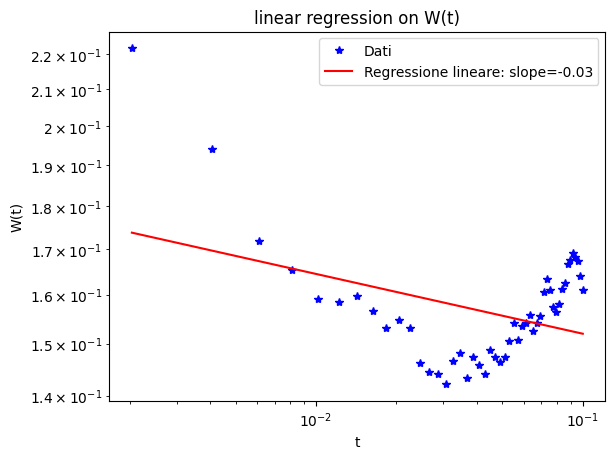

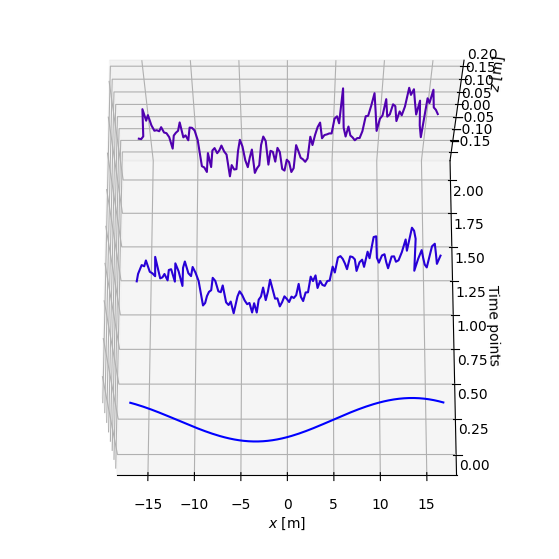

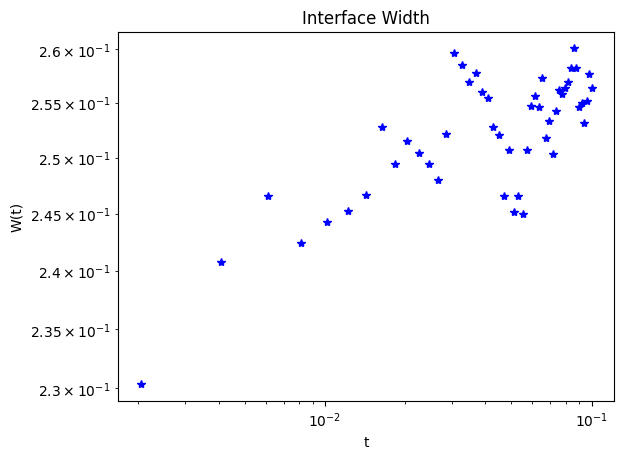

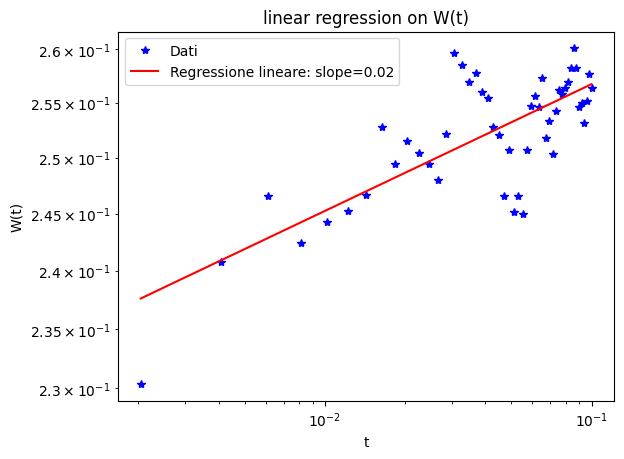

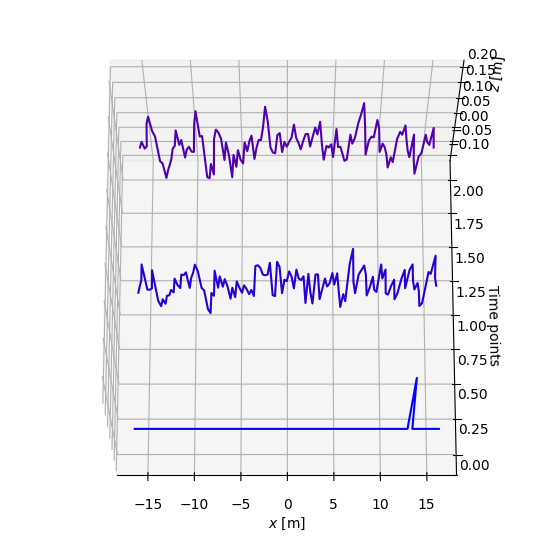

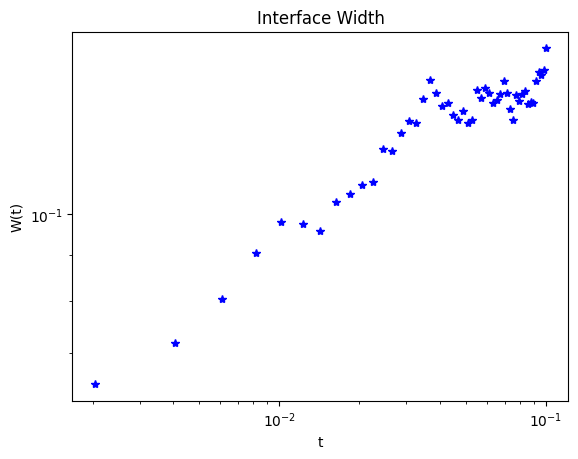

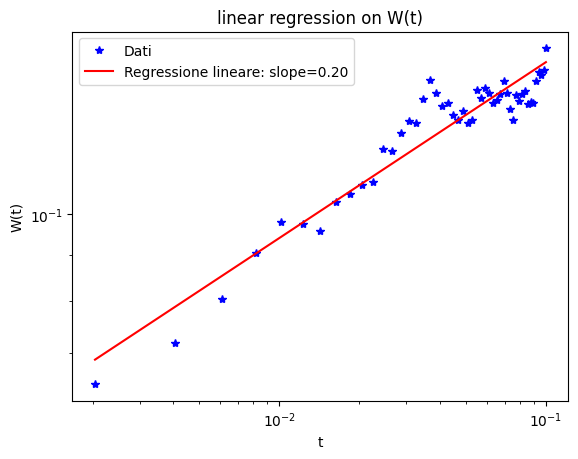

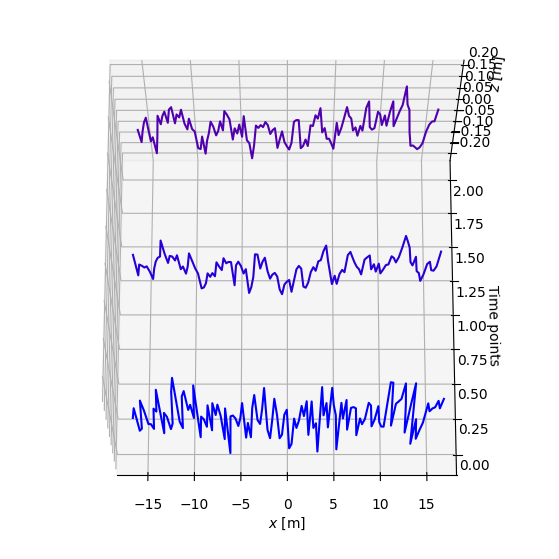

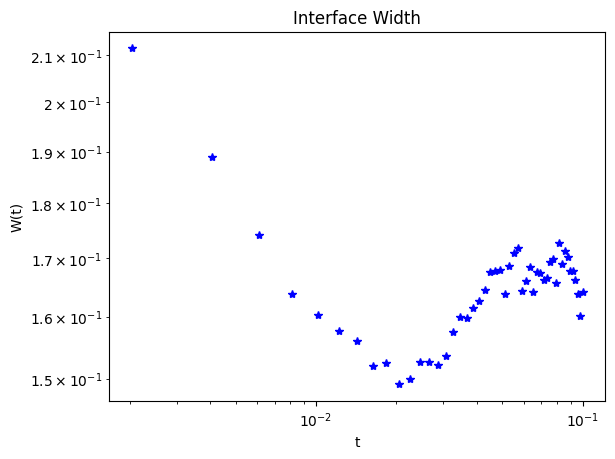

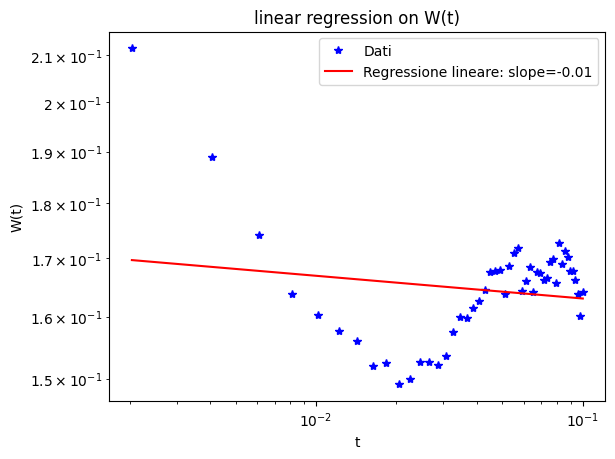

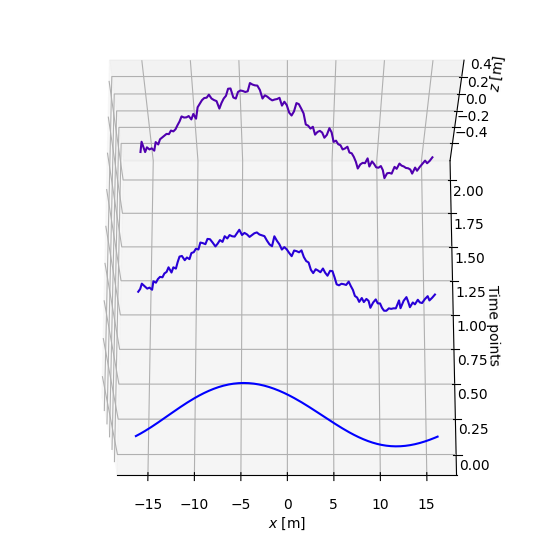

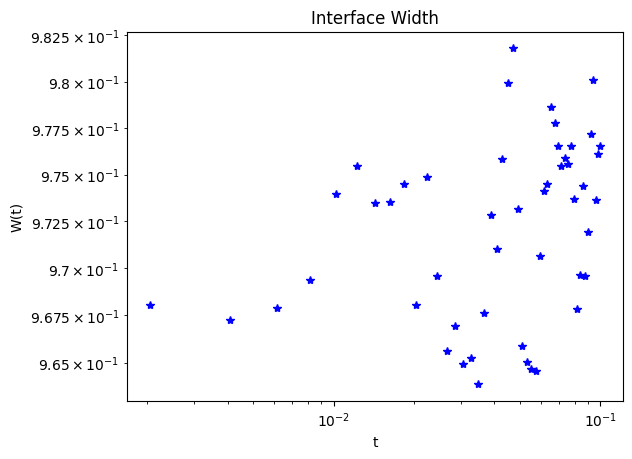

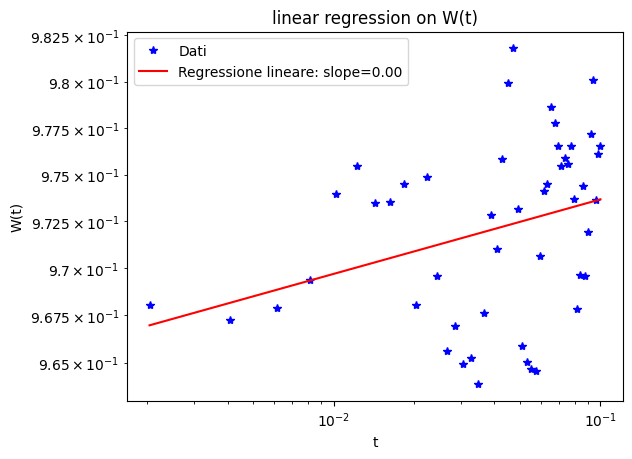

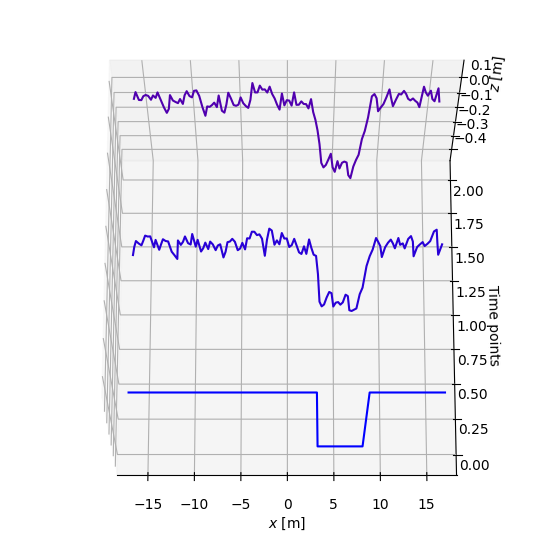

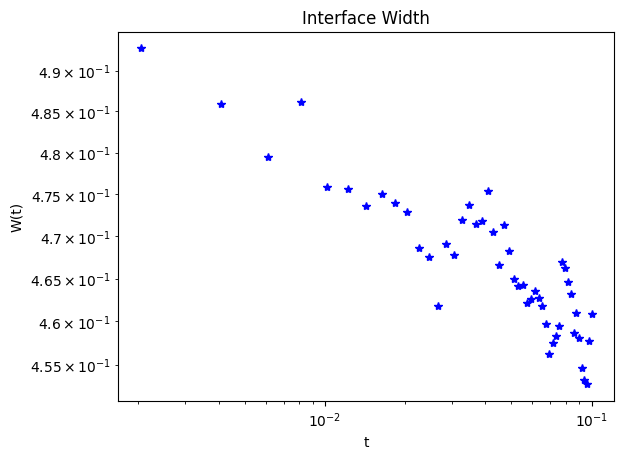

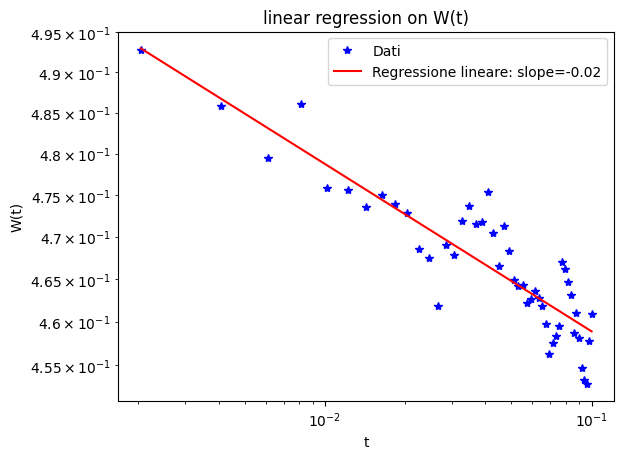

"\nu0 = np.zeros(Nx)\nl,W= kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u0,noise,L)\n\neven_indices = np.arange(0, Nx, 2)\nX=xaxis[even_indices]\n\n\nplot_spatio_temp_3D(X,taxis,l.T)\n\nplot_sequence(X,l)\n\n\n\n\n\nplt.figure()\nplt.loglog(taxis, W, 'b*', linewidth=2)\nplt.title('Interface Width')\nplt.xlabel('t')\nplt.ylabel('W(t)')\nplt.show()\n\nnff = len(taxis)\nhm = np.mean(W[:nff])\n\nnf = np.argmax(W >= (hm - 0.01))-1\nnf= len(taxis)\n# linear regression\n#print(nf)\nslope, intercept = np.polyfit(np.log10(taxis[2:nf]), np.log10(W[2:nf]), 1)\ny_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)\n\n# Plot of data and regression\nplt.loglog(taxis[1:], W[1:], 'b*', label='Dati')\nplt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')\n\n\nplt.xlabel('t')\nplt.ylabel('W(t)')\nplt.title('linear regression on W(t)')\nplt.legend()\nplt.show()"

In [ ]:
import numpy as np
import pyDOE
from scipy.stats import geom

def kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u0,noise,L):
  k_values = []
  ULH_values = []
  # Arrays for calculations
  k = np.zeros(Nx)

  # Leap Hop
  ULH = u0.copy()

  #I want to save the spatial points for each time because I want to use the to study the growth exponent
  k_values.append(k.copy())
  ULH_values.append(ULH.copy())
  W = np.zeros(Nt+1)
  dw = np.zeros(Nt+1)

  # Zeroth stage: UPFD, half time step
  for i in range(1, Nx - 1, 2):
      k[i] = 1 * np.random.normal(0, noise)
      mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
      ULH[i] = (ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[i] * h / 2) / (1 + r)

  # Big loop for time (Leap Hop)
  for tind in range(Nt):  # Adjusted loop to iterate up to Nt

      for i in range(2, Nx - 2, 2):
          k[i] = 1* np.random.normal(0, noise)
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2
          ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)

      ULH[0] = ULH[2]
      ULH[Nx - 1] = ULH[Nx - 3]
      k[0] = k[2]
      k[Nx - 1] = k[Nx - 3]
      k_values.append(k.copy())
      ULH_values.append(ULH.copy())
      W[tind+1] =np.sqrt((1 / L) * np.sum((ULH - np.mean(ULH)) * (ULH - np.mean(ULH))))
      dw=W[1]-W[tind+1]
      for i in range(1, Nx - 1, 2):
          k[i] = 1 * np.random.normal(0, noise)
          mm = 0.25 * (ULH[i - 1] - ULH[i + 1]) ** 2

          if taxis[tind + 1] < tf - h / 2:  # Adjusted the index to taxis[tind + 1]

              ULH[i] = ((1 - r) * ULH[i] + r * (ULH[i - 1] + ULH[i + 1]) + r * La2 / D * mm + k[i] * h) / (1 + r)
          else:
              #print('nene')
              ULH[i] = ((1 - r / 2) * ULH[i] + r / 2 * (ULH[i - 1] + ULH[i + 1]) + r / 2 * La2 / D * mm + k[
                  i] * h / 2) / (1 + r / 2)
              #ULH[tind+2,i] con i pari deve essere 0

  even_indices = np.arange(0, Nx, 2)
  H=np.array(ULH_values)[:,even_indices]
  NOISE=np.array(k_values)[:,even_indices]
  return H,W#,NOISE


noise=10
# Inputs (data)
data_prefix = 'KPZ_Eqn{}'.format(noise)

n_IC = 6  # Number of initial conditions in each file.  6000
n_train = 1  # Number of training files. 20
M = n_IC * n_train // 3  # Samples from latin hypercube

#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////
# Parameters

h = 0.002
Nt = 49
tf = h * (Nt+1)  # End time
Nx = 256#257

ti = 0
L = 32
xi = -L/2
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print('taxis.shape',taxis.shape)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 1
La2 = 3 #lambda/2


even_indices = np.arange(0, Nx, 2)

# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx


#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
print('xaxis.shape',xaxis.shape)


# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)




#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////
# Create vectors of random values for sines

# Sampling of A and phi
X = pyDOE.lhs(2, samples=M, criterion='maximin')

A_vect = X[:, 0]/2
phi_vect = 2 * np.pi * X[:, 1]

# Sampling of omega
max_omega = 9
cum_distrib = geom.cdf(np.arange(1, max_omega + 1), 0.25)
cum_distrib = cum_distrib / cum_distrib[-1]
numbs = np.random.uniform(size=M)

omega_vect = np.zeros(M)

for k in range(max_omega):
    omega_vect = omega_vect + (numbs < cum_distrib[k])

omega_vect = 10 - omega_vect

# Create vectors of random values for square waves

# Sampling of A, c, and w
X = pyDOE.lhs(3, samples=M, criterion='maximin')
A2_vect = X[:, 0]/2
c_vect = L * X[:, 1] - L / 2
w_vect = (L - 4 * (xaxis[1] - xaxis[0])) * X[:, 2] + 2 * (xaxis[1] - xaxis[0])



# Loop over files
sine_ind = 0
square_ind = 0
for train_num in range(n_train):
    indice_taj=np.zeros((n_IC))
    data_set = 'train{}_x'.format(train_num + 1)

    # Set Initial Conditions
    u_0 = np.zeros((n_IC, Nx))
    n=Nx-2##/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#///////
    # White noise
    for k in range(0, n_IC - 2, 3):
        ut = np.zeros(n, dtype=np.complex128)
        ut[0] = np.random.normal()
        ut[1:n // 2] = (np.random.normal(size=(n // 2 - 1))
                        + 1j * np.random.normal(size=(n // 2 - 1)))
        ut[n // 2] = np.random.normal()
        ut[n // 2 + 1:] = np.flipud(np.conj(ut[1:n // 2]))
        u = np.real(np.fft.ifft(ut))
        #u_0[k, :] = u - np.mean(u)
##
        u_0[k, 1:-1] = u - np.mean(u)
        #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##

    # Sines
    for k in range(1, n_IC - 1, 3):
        #u_0[k, :] = A_vect[sine_ind] * np.sin(2 * np.pi * omega_vect[sine_ind]/ L * x + phi_vect[sine_ind])
##
        u_0[k, 1:-1] = A_vect[sine_ind] * np.sin(2 * np.pi * omega_vect[sine_ind]
                                              / L * xaxis[1:-1] + phi_vect[sine_ind])

       #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##
        sine_ind += 1

    # Square waves
    for k in range(2, n_IC, 3):
        u = ((A2_vect[square_ind]) * np.logical_or(
            np.logical_or(
                np.abs(xaxis[1:-1] - c_vect[square_ind]) < w_vect[square_ind] / 2,
                np.abs(xaxis[1:-1] + L - c_vect[square_ind]) < w_vect[square_ind] / 2),
            np.abs(xaxis[1:-1] - L - c_vect[square_ind]) < w_vect[square_ind] / 2))

        #u_0[k,:] = u - np.mean(u)
##
        u_0[k, 1:-1] = u - np.mean(u)

      #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##
        square_ind += 1
    X=xaxis[even_indices]


    # Solve KPZ Equation
    Data = np.zeros((n_IC, Nt+1, len(even_indices)), dtype=np.float32)
    for k in range(n_IC):


        Data[k, :, :],W= kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u_0[k, :],noise,L)

        even_indices = np.arange(0, Nx, 2)
        X=xaxis[even_indices]


        #plot_spatio_temp_3D(X,taxis,Data[k, :, :].T)

        plot_sequence(X,Data[k, :, :])





        plt.figure()
        plt.loglog(taxis, W, 'b*', linewidth=2)
        plt.title('Interface Width')
        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.show()

        nff = len(taxis)
        hm = np.mean(W[:nff])

        nf = np.argmax(W >= (hm - 0.01))-1
        nf= len(taxis)
        # linear regression
        #print(nf)
        slope, intercept = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1)
        y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)

        # Plot of data and regression
        plt.loglog(taxis[1:], W[1:], 'b*', label='Dati')
        plt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')


        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.title('linear regression on W(t)')
        plt.legend()
        plt.show()

"""
u0 = np.zeros(Nx)
l,W= kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u0,noise,L)

even_indices = np.arange(0, Nx, 2)
X=xaxis[even_indices]


plot_spatio_temp_3D(X,taxis,l.T)

plot_sequence(X,l)





plt.figure()
plt.loglog(taxis, W, 'b*', linewidth=2)
plt.title('Interface Width')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()

nff = len(taxis)
hm = np.mean(W[:nff])

nf = np.argmax(W >= (hm - 0.01))-1
nf= len(taxis)
# linear regression
#print(nf)
slope, intercept = np.polyfit(np.log10(taxis[2:nf]), np.log10(W[2:nf]), 1)
y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)

# Plot of data and regression
plt.loglog(taxis[1:], W[1:], 'b*', label='Dati')
plt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')


plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('linear regression on W(t)')
plt.legend()
plt.show()"""

In [ ]:
import numpy as np
import pyDOE
from scipy.stats import geom

def kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u0,noise,L):
  k_values = []
  UTEMP2_values = []
  # Arrays for calculations

  k = np.zeros(Nx)
  UTEMP = np.zeros(Nx)
  UTEMP2 = np.zeros(Nx)
  UHeun = np.zeros(Nx)
  UHeun = u0.copy()
  #I want to save the spatial points for each time because I want to use the to study the growth exponent
  k_values.append(k.copy())
  UTEMP2_values.append(UHeun.copy())
  W = np.zeros(Nt+1)
  dw = np.zeros(Nt+1)

  for tind in range(Nt):  # Adjusted loop to iterate up to Nt
      #t = taxis[tind]
      for i in range(Nx):
          k[i] = 1 * np.random.normal(0, noise)

      for i in range(1, Nx - 1):
          UTEMP[i] = UHeun[i] + r * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i]) + La2 * r2 ** 2 * (
                      UHeun[i + 1] - UHeun[i - 1]) ** 2 * h + k[i] * h

      UTEMP[0] = UTEMP[2]
      UTEMP[Nx - 1] = UTEMP[Nx - 3]

      for i in range(1, Nx - 1):
          UTEMP2[i] = UHeun[i] + r / 2 * (UHeun[i - 1] + UHeun[i + 1] - 2 * UHeun[i] + UTEMP[i - 1] + UTEMP[i + 1] - 2 * UTEMP[
              i]) + La2 * r2 ** 2 * h / 2 * ((UHeun[i + 1] - UHeun[i - 1]) ** 2 + (UTEMP[i + 1] - UTEMP[i - 1]) ** 2) + k[
                          i] * h

      UTEMP2[0] = UTEMP2[2]
      UTEMP2[Nx - 1] = UTEMP2[Nx - 3]
      k_values.append(k.copy())
      UTEMP2_values.append(UTEMP2.copy())
      UHeun = UTEMP2
      W[tind+1] =np.sqrt((1 / L) * np.sum((UTEMP2 - np.mean(UTEMP2)) * (UTEMP2 - np.mean(UTEMP2))))
      dw=W[1]-W[tind+1]
  print(UTEMP2_values[2].shape)
  H=np.array(UTEMP2_values)
  NOISE=np.array(k_values)
  print(H.shape)

  return H,W #,NOISE


noise=10
# Inputs (data)
data_prefix = 'KPZ_Eqn{}'.format(noise)

n_IC = 6  # Number of initial conditions in each file.  6000
n_train = 1  # Number of training files. 20
M = n_IC * n_train // 3  # Samples from latin hypercube

#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////
# Parameters

h = 0.002
Nt = 49
tf = h * (Nt+1)  # End time
Nx = 256#257

ti = 0
L = 32
xi = -L/2
xf = xi + L
Dx = L / (Nx - 3)
print(Dx)

# Space and time axes
xaxis = np.zeros(Nx)
taxis = np.linspace(ti, tf, Nt + 1)
print('taxis.shape',taxis.shape)


# Constants: KPZ Diffusion, Nonlin and Brown noise coefficient
D = 0.1
La2 = 3 #lambda/2


# Fill initial function
for i in range(1, Nx - 1):
    xaxis[i] = xi + (i - 2) * Dx


#Boundaries
xaxis[0] = xaxis[2]
xaxis[Nx - 1] = xaxis[Nx - 3]
print('xaxis.shape',xaxis.shape)


# Mesh parameters
r = h * D / Dx ** 2
r2 = 1 / (Dx * 2)

#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#/////////////////////////////////////////////////////
# Create vectors of random values for sines

# Sampling of A and phi
X = pyDOE.lhs(2, samples=M, criterion='maximin')

A_vect = X[:, 0]/2
phi_vect = 2 * np.pi * X[:, 1]

# Sampling of omega
max_omega = 9
cum_distrib = geom.cdf(np.arange(1, max_omega + 1), 0.25)
cum_distrib = cum_distrib / cum_distrib[-1]
numbs = np.random.uniform(size=M)

omega_vect = np.zeros(M)

for k in range(max_omega):
    omega_vect = omega_vect + (numbs < cum_distrib[k])

omega_vect = 10 - omega_vect

# Create vectors of random values for square waves

# Sampling of A, c, and w
X = pyDOE.lhs(3, samples=M, criterion='maximin')
A2_vect = X[:, 0]/2
c_vect = L * X[:, 1] - L / 2
w_vect = (L - 4 * (xaxis[1] - xaxis[0])) * X[:, 2] + 2 * (xaxis[1] - xaxis[0])



# Loop over files
sine_ind = 0
square_ind = 0
for train_num in range(n_train):
    indice_taj=np.zeros((n_IC))
    data_set = 'train{}_x'.format(train_num + 1)

    # Set Initial Conditions
    u_0 = np.zeros((n_IC, Nx))
    n=Nx-2##/////////////////////////////////////////////////////#/////////////////////////////////////////////////////#///////
    # White noise
    for k in range(0, n_IC - 2, 3):
        ut = np.zeros(n, dtype=np.complex128)
        ut[0] = np.random.normal()
        ut[1:n // 2] = (np.random.normal(size=(n // 2 - 1))
                        + 1j * np.random.normal(size=(n // 2 - 1)))
        ut[n // 2] = np.random.normal()
        ut[n // 2 + 1:] = np.flipud(np.conj(ut[1:n // 2]))
        u = np.real(np.fft.ifft(ut))
        #u_0[k, :] = u - np.mean(u)
##
        u_0[k, 1:-1] = u - np.mean(u)
        #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##

    # Sines
    for k in range(1, n_IC - 1, 3):
        #u_0[k, :] = A_vect[sine_ind] * np.sin(2 * np.pi * omega_vect[sine_ind]/ L * x + phi_vect[sine_ind])
##
        u_0[k, 1:-1] = A_vect[sine_ind] * np.sin(2 * np.pi * omega_vect[sine_ind]
                                              / L * xaxis[1:-1] + phi_vect[sine_ind])

       #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##
        sine_ind += 1

    # Square waves
    for k in range(2, n_IC, 3):
        u = ((A2_vect[square_ind]) * np.logical_or(
            np.logical_or(
                np.abs(xaxis[1:-1] - c_vect[square_ind]) < w_vect[square_ind] / 2,
                np.abs(xaxis[1:-1] + L - c_vect[square_ind]) < w_vect[square_ind] / 2),
            np.abs(xaxis[1:-1] - L - c_vect[square_ind]) < w_vect[square_ind] / 2))

        #u_0[k,:] = u - np.mean(u)
##
        u_0[k, 1:-1] = u - np.mean(u)

      #bound conditions
        u_0[k,0] = u_0[k,2]
        u_0[k,Nx - 1] = u_0[k,Nx - 3]
##
        square_ind += 1



    # Solve KPZ Equation
    W = np.zeros(Nt+1)
    Data = np.zeros((n_IC, Nt+1, len(xaxis)), dtype=np.float32)
    for k in range(n_IC):


        Data[k, :, :],W= kpz(r,r2,xaxis,D,La2,taxis,Nx,Nt,h,tf,u_0[k, :],noise,L)




        plot_spatio_temp_3D(xaxis,taxis,Data[k, :, :].T)

        plot_sequence(xaxis,Data[k, :, :])





        plt.figure()
        plt.loglog(taxis, W, 'b*', linewidth=2)
        plt.title('Interface Width')
        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.show()

        nff = len(taxis)
        hm = np.mean(W[:nff])

        nf = np.argmax(W >= (hm - 0.01))-1
        nf= len(taxis)
        # linear regression
        #print(nf)
        slope, intercept = np.polyfit(np.log10(taxis[1:nf]), np.log10(W[1:nf]), 1)
        y_fit = 10 ** (slope * np.log10(taxis[1:]) + intercept)

        # Plot of data and regression
        plt.loglog(taxis[1:], W[1:], 'b*', label='Dati')
        plt.loglog(taxis[1:], y_fit, '-r', label=f'Regressione lineare: slope={slope:.2f}')


        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.title('linear regression on W(t)')
        plt.legend()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Nuova sezione

KPZ con altro metodo

In [ ]:
pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=4a4631458704af5cb22600690c7dcc0a63b404dab61e1a74c24e5d2ee4acc624
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


In [ ]:
import numpy as np

import pyDOE
from scipy.stats import geom
#from functions import Burgers_Periodic#////////////////////////////////////////////////////////////////////////////////////////////////////////

np.random.seed(0)
dt = 0.05
dx = 1
L = 512
T = 10000# con 10000 esponenete di crescuita viene migliore
x = np.arange(0, L + dx, dx)
t = np.arange(0, T + dt, dt)
lt = len(t)
lx = len(x)
print(lx)
print(lt)
n=lx
#n = 128  # Number of grid points
n_IC=3
M=n_IC
"""
# Inputs (Burgers')
eps = 10.0  # strength of advection
mu = 1.0  # viscosity in Burgers'
L = 2 * np.pi  # Length of domain
dt = 0.002  # Size of time step for data
n_time = 51  # Number of time steps
T = dt * (n_time - 1)  # End time
dt_factor = 1000  # Divide dt by this factor for numerical stability

# Discretize x
x = np.linspace(-L / 2, L / 2, n + 1)
x = x[:n]

# Discretize t
t = np.linspace(0, T, n_time)
"""
# Create vectors of random values for sines

# Sampling of A and phi
X = pyDOE.lhs(2, samples=M, criterion='maximin')
A_vect = X[:, 0]
phi_vect = 2 * np.pi * X[:, 1]

# Sampling of omega
max_omega = 10
cum_distrib = geom.cdf(np.arange(1, max_omega + 1), 0.25)
cum_distrib = cum_distrib / cum_distrib[-1]
numbs = np.random.uniform(size=M)

omega_vect = np.zeros(M)

for k in range(max_omega):
    omega_vect = omega_vect + (numbs < cum_distrib[k])

omega_vect = 11 - omega_vect

# Create vectors of random values for square waves

# Sampling of A, c, and w
X = pyDOE.lhs(3, samples=M, criterion='maximin')
A2_vect = X[:, 0]
c_vect = L * X[:, 1] - L / 2
w_vect = (L - 4 * (x[1] - x[0])) * X[:, 2] + 2 * (x[1] - x[0])

# Loop over files
sine_ind = 0
square_ind = 0

# Set Initial Conditions
u_0 = np.zeros((n_IC, n))

# White noise
for k in range(0, n_IC - 2, 3):
    ut = np.zeros(n, dtype=np.complex128)
    ut[0] = np.random.normal()
    ut[1:n // 2] = (np.random.normal(size=(n // 2 - 1))
                    + 1j * np.random.normal(size=(n // 2 - 1)))
    ut[n // 2] = np.random.normal()
    ut[n // 2 + 1:] = np.flipud(np.conj(ut[1:n // 2]))
    u = np.real(np.fft.ifft(ut))
    u_0[k, :] = u - np.mean(u)

# Sines
for k in range(1, n_IC - 1, 3):
    u_0[k, :] = A_vect[sine_ind] * np.sin(2 * np.pi * omega_vect[sine_ind]
                                          / L * x + phi_vect[sine_ind])
    sine_ind += 1

# Square waves
for k in range(2, n_IC, 3):
    u = (A2_vect[square_ind] * np.logical_or(
        np.logical_or(
            np.abs(x - c_vect[square_ind]) < w_vect[square_ind] / 2,
            np.abs(x + L - c_vect[square_ind]) < w_vect[square_ind] / 2),
        np.abs(x - L - c_vect[square_ind]) < w_vect[square_ind] / 2))
    u_0[k, :] = u - np.mean(u)
    square_ind += 1


513
200001


ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sanitizing
np.random.seed(0)
plt.close('all')

# Dimension
dt = 0.05
dx = 1
L = 512
T = 10000# con 10000 esponenete di crescuita viene migliore
x = np.arange(0, L + dx, dx)
t = np.arange(0, T + dt, dt)
lt = len(t)
lx = len(x)

# Parameters
vj = np.array([1])
lj = np.array([6.93])
c = 1
D = 1
d = 1
r = np.sqrt((2 * D) / (dx ** d))

# Random numbers
a = -0.5
b = 0.5
np.random.seed(0)
ru = a + (b - a) * np.random.rand(lt, lx)
#ru = np.random.normal(0, 10,(lt, lx))

for vi in range(len(vj)):
    v = vj[vi]

    for li in range(len(lj)):
        lambda_val = lj[li]

        # Initial condition
        h = np.zeros(lx)
        h0 = np.zeros(lx)
        h0 = np.sin(np.pi*x/4)+np.cos(np.pi*x/4)

        H = [h0]

        # G
        g = (lambda_val * lambda_val * D) / (v * v * v)

        W = np.zeros(lt)

        for n in range(lt-1):

            for i in range(lx):
                if i == 0:
                    h[i] = h0[i] + dt * (
                            (v / (dx * dx)) * (h0[lx - 1] - 2 * h0[i] + h0[i + 1]) +
                            lambda_val * (1 + 0.5 * ((1 - np.exp(-c * (((h0[i + 1] - h0[lx - 1]) / (2 * dx)) ** 2))) / c))) + r * np.sqrt(
                        12 * dt) * ru[n, i]
                elif i == lx - 1:
                    h[i] = h0[i] + dt * (
                            (v / (dx * dx)) * (h0[i - 1] - 2 * h0[i] + h0[0]) +
                            lambda_val * (1 + 0.5 * ((1 - np.exp(-c * (((h0[0] - h0[i - 1]) / (2 * dx)) ** 2))) / c))) + r * np.sqrt(
                        12 * dt) * ru[n, i]
                else:
                    h[i] = h0[i] + dt * (
                            (v / (dx * dx)) * (h0[i - 1] - 2 * h0[i] + h0[i + 1]) +
                            lambda_val * (1 + 0.5 * ((1 - np.exp(-c * (((h0[i + 1] - h0[i - 1]) / (2 * dx)) ** 2))) / c))) + r * np.sqrt(
                        12 * dt) * ru[n, i]
            H.append(h)
            h0 = h
            #print(h)
            # Interface width
            W[n] = np.sqrt((1 / L) * np.sum((h - np.mean(h)) * (h - np.mean(h))))
        h = np.array(H)
        plot_spatio_temp_3D(x,t,h.T)

        plot_sequence(x,h)
        plt.figure()
        plt.plot(x, h[-1,:], 'b', linewidth=2)
        plt.title('Profile KPZ 1D')
        plt.xlabel('x')
        plt.ylabel('h(x)')
        plt.axis([1, 512, -1, np.max(h)])
        # Salvataggio dell'immagine come file PNG
        plt.savefig('Profile KPZ 1D.png')

        plt.figure()
        plt.loglog(t, W, 'b*', linewidth=2)
        plt.title('Interface Width')
        plt.xlabel('t')
        plt.ylabel('W(t)')
        # Salvataggio dell'immagine come file PNG
        plt.savefig('Interface Width.png')

        # Finding the w_saturation
        n00 = np.where(t == 1)[0][0]
        nff = len(t)
        hm = np.mean(W[n00:nff])
        j = np.where(W >= (hm - 0.01))[0][0]

        # Finding the growth exponent
        n0 = np.where(t == 1)[0][0]
        nf = j - 10
        slope = np.polyfit(np.log10(t[n0:nf]), np.log10(W[n0:nf]), 1)

        plt.figure()
        plt.loglog(t, W, 'b*', linewidth=2)
        plt.title('Interface Width')
        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.loglog(t, hm * np.ones_like(W), '-*r')
        plt.text(t[n0] + 2, W[j] + 1, 'w_sat = {}'.format(hm))

        # Salvataggio dell'immagine come file PNG
        plt.savefig('Interface Width.png')

        y = 10 ** (slope[0] * np.log10(t) + slope[1])

        txi = np.where(y >= hm)[0][0]

        plt.plot(t[n0:txi], y[n0:txi], '-*r')
        plt.text(t[n0] + 100, y[n0] + 1, 'beta = {}'.format(slope[0]))

        plt.loglog(t[txi] * np.ones_like(W), W, '*-k')
        plt.text(t[txi] + 100, y[txi] + 1, 'tx = {}'.format(t[txi]))

plt.show()